# Df 0 0 7_Snapshot
This tutorial shows how to write out datasets in ROOT formatusing the RDataFrame



**Author:** Danilo Piparo  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:02 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


A simple helper function to fill a test tree: this makes the example stand-alone.

In [2]:
def fill_tree(treeName, fileName):
    tdf = ROOT.ROOT.RDataFrame(10000)
    tdf.Define("b1", "(int) tdfentry_")\
       .Define("b2", "(float) tdfentry_ * tdfentry_").Snapshot(treeName, fileName)

We prepare an input tree to run on

In [3]:
fileName = "df007_snapshot_py.root"
outFileName = "df007_snapshot_output_py.root"
outFileNameAllColumns = "df007_snapshot_output_allColumns_py.root"
treeName = "myTree"
fill_tree(treeName, fileName)

We read the tree from the file and create a RDataFrame.

In [4]:
RDF = ROOT.ROOT.RDataFrame
d = RDF(treeName, fileName)

## Select entries
We now select some entries in the dataset

In [5]:
d_cut = d.Filter("b1 % 2 == 0")

## Enrich the dataset
Build some temporary columns: we'll write them out

In [6]:
getVector_code ='''
std::vector<float> getVector (float b2)
{
   std::vector<float> v;
   for (int i = 0; i < 3; i++) v.push_back(b2*i);
   return v;
}
'''
ROOT.gInterpreter.Declare(getVector_code)

d2 = d_cut.Define("b1_square", "b1 * b1") \
          .Define("b2_vector", "getVector( b2 )")

## Write it to disk in ROOT format
We now write to disk a new dataset with one of the variables originally
present in the tree and the new variables.
The user can explicitly specify the types of the columns as template
arguments of the Snapshot method, otherwise they will be automatically
inferred.

In [7]:
branchList = ROOT.vector('string')()
for branchName in ["b1", "b1_square", "b2_vector"]:
    branchList.push_back(branchName)
d2.Snapshot(treeName, outFileName, branchList)

<ROOT.ROOT::RDF::RResultPtr<ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void> > object at 0x560bed844e00>

Open the new file and list the columns of the tree

In [8]:
f1 = ROOT.TFile(outFileName)
t = f1.myTree
print("These are the columns b1, b1_square and b2_vector:")
for branch in t.GetListOfBranches():
    print("Branch: %s" %branch.GetName())

f1.Close()

These are the columns b1, b1_square and b2_vector:
Branch: b1
Branch: b1_square
Branch: b2_vector


We are not forced to write the full set of column names. We can also
specify a regular expression for that. In case nothing is specified, all
columns are persistified.

In [9]:
d2.Snapshot(treeName, outFileNameAllColumns)

<ROOT.ROOT::RDF::RResultPtr<ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void> > object at 0x560be9eb3370>

Open the new file and list the columns of the tree

In [10]:
f2 = ROOT.TFile(outFileNameAllColumns)
t = f2.myTree
print("These are all the columns available to this tdf:")
for branch in t.GetListOfBranches():
    print("Branch: %s" %branch.GetName())

f2.Close()

These are all the columns available to this tdf:
Branch: b1_square
Branch: b2_vector
Branch: b1
Branch: b2


We can also get a fresh RDataFrame out of the snapshot and restart the
analysis chain from it.

In [11]:
branchList.clear()
branchList.push_back("b1_square")
snapshot_tdf = d2.Snapshot(treeName, outFileName, branchList);
h = snapshot_tdf.Histo1D("b1_square")
c = ROOT.TCanvas()
h.Draw()

Draw all canvases 

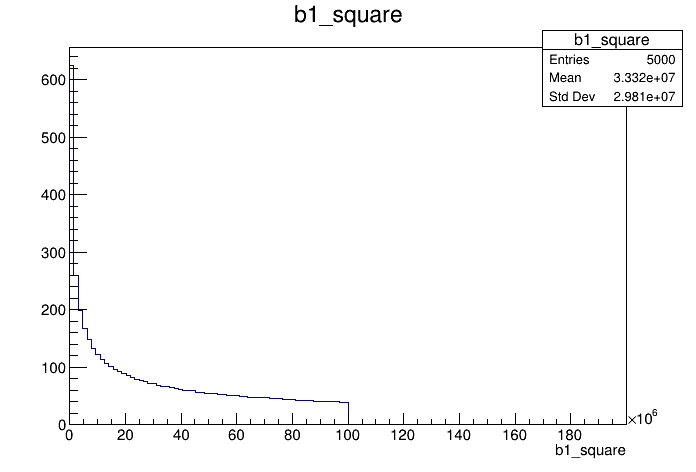

In [12]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()